**Medikal Maliyet Analizi**

---



Kullanılan data seti: https://www.kaggle.com/datasets/mirichoi0218/insurance

Projenin amacı, verilen değişkenlere göre bir kişinin sağlık sigortasının yaklaşık ne kadar masraflı olacagını tahmin etmektir.

In [1]:
#Kullanılacak kütüphanelerin eklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Datanın import edilmesi
df = pd.read_csv('insurance.csv')

In [3]:
#Eklenen orjinal datayı korumak için kopya oluşturduk bunun üzerinde çalışacağız
data = df.copy()

**Datanın incelenmesi**

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape 

(1338, 7)

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Bmi(Vücut Kitle İndeksi)’nin dağılımı**

In [9]:
data['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

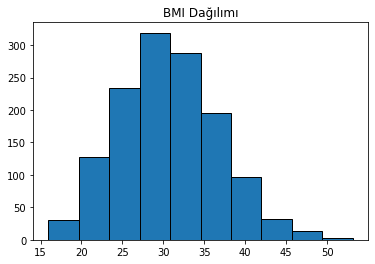

In [10]:
plt.hist(data['bmi'], edgecolor = 'black')
plt.title('BMI Dağılımı')
plt.show()

**“smoker” ile “charges” arasındaki ilişkiyi inceleyiniz**

Sigara içenlerin ortalama sigorta masrafı 32050.23183153284 iken sigara içmeyenlerin ortalama sigorta masrafı 8434.268297856204


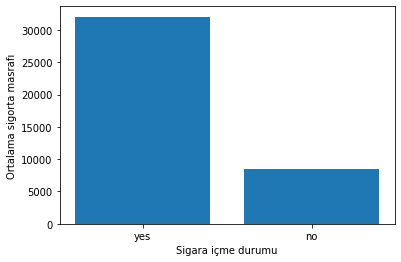

In [11]:
#Sigara içenler ile içmeyenlerin ödediği ortalama sigorta masrafına bakabiliriz

#Sigara içme durumu bar chartımızda x aksımız olacak
smoker_status = data['smoker'].unique()

#Sigara içme durumuna göre ortalama sigorta harcamalarını bulup bar chart da ekleyerek özetliyoruz
avg_charge_smoker_yes = data.loc[data['smoker'] == 'yes', 'charges'].mean()
avg_charge_smoker_no = data.loc[data['smoker'] == 'no', 'charges'].mean()

print(f'Sigara içenlerin ortalama sigorta masrafı {avg_charge_smoker_yes} iken sigara içmeyenlerin ortalama sigorta masrafı {avg_charge_smoker_no}')

y = np.array([avg_charge_smoker_yes, avg_charge_smoker_no])
plt.bar(smoker_status, y)
plt.xlabel('Sigara içme durumu')
plt.ylabel('Ortalama sigorta masrafı')
plt.show()

**“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.**

In [12]:
reg_smo = data.groupby(['region', 'smoker'])['smoker'].count()
reg_smo = reg_smo.to_frame()

reg_smo


smoker
region    smoker        
northeast no         257
          yes         67
northwest no         267
          yes         58
southeast no         273
          yes         91
southwest no         267
          yes         58

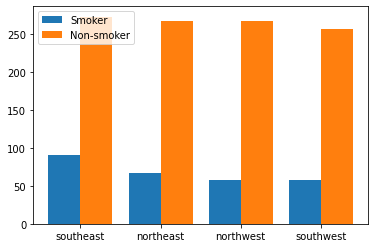

In [13]:
smoke_region = data[data['smoker'] == 'yes'].value_counts('region')
non_smoke_region = data[data['smoker'] == 'no'].value_counts('region')

regionlar = smoke_region.index
smoker = smoke_region.values
non_smoker = non_smoke_region.values

x_axis = np.arange(len(regionlar))

# Multi bar Chart

plt.bar(x_axis -0.2, smoker, width=0.4, label = 'Smoker')
plt.bar(x_axis +0.2, non_smoker, width=0.4, label = 'Non-smoker')

# Xticks

plt.xticks(x_axis, regionlar)

# Add legend

plt.legend()

# Display

plt.show()



**“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.**

In [14]:
#“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
avg_bmi_female = data.loc[data['sex'] == 'female', 'bmi'].mean()
avg_bmi_male = data.loc[data['sex'] == 'male', 'bmi'].mean()

print('Average BMI in females:', avg_bmi_female)
print('Average BMI in males:', avg_bmi_male)



Average BMI in females: 30.37774924471299
Average BMI in males: 30.943128698224854


**En çok “children”’a sahip “region”’ı bulunuz.**

In [15]:
#Bölge isimlerini tekilleştiriyoruz üzerinde iterasyon yapabilmek için.
regions = data['region'].unique()   

#Bölgedeki toplam çocuk sayısını hesaplayıp bölge ismi key, çocuk sayısı value olacak şekilde başta yaratmış olduğumuz dictionary'e yazıyoruz
reg_chl = {}
for region in regions:
  nbr_children = data.loc[data['region'] == region, 'children'].sum()
  reg_chl[region] = nbr_children

#Tüm bölgelerdeki toplam çocuk sayısını ve en fazla çocuğa sahip olan bölgeyi yazdırıyoruz
print('Bölgelere göre çocuk sayısı:', reg_chl)
print('En fazla çocuğa sahip olan bölge:', max(reg_chl, key=reg_chl.get))

Bölgelere göre çocuk sayısı: {'southwest': 371, 'southeast': 382, 'northwest': 373, 'northeast': 339}
En fazla çocuğa sahip olan bölge: southeast


**“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.**

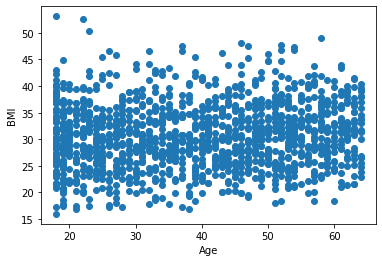

In [16]:
plt.scatter(x=data['age'], y=data['bmi'])

plt.xlabel('Age')
plt.ylabel('BMI')

plt.show()

**“bmi” ile “children” arasındaki ilişkiyi inceleyiniz.**

In [17]:
data.groupby('children')[['bmi']].mean()

,bmi
children,
0,30.550296
1,30.623148
2,30.978104
3,30.684331
4,31.391200
5,29.605000


**“bmi” değişkeninde outlier var mıdır? İnceleyiniz.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


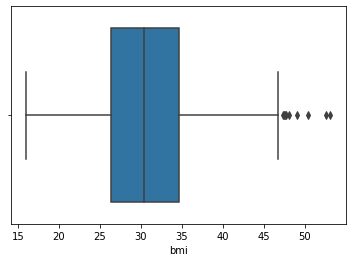

In [18]:
sns.boxplot(data['bmi']) 

#45'in üstündekiler outlier

**“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.**

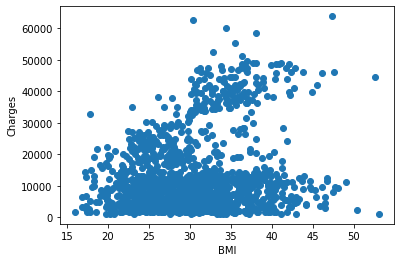

In [19]:
plt.scatter(x=data['bmi'], y=data['charges'])

plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()

**“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.**

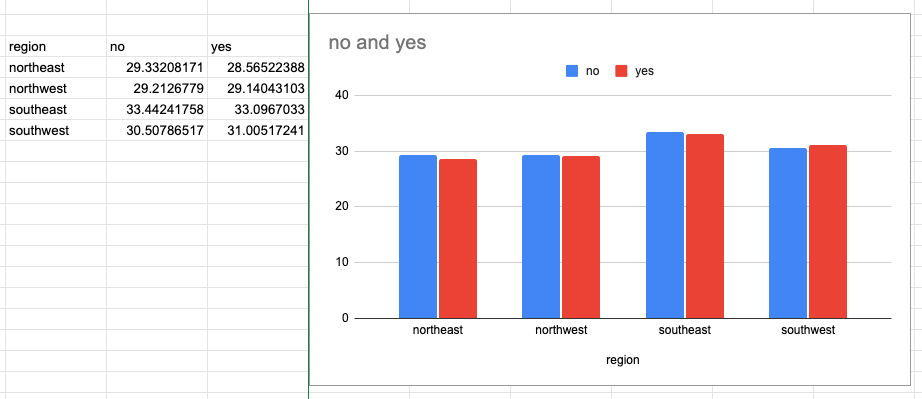

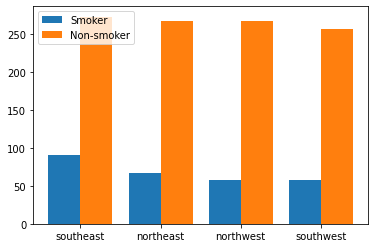

In [ ]:
smoke_region = data[data['smoker'] == 'yes'].value_counts('region')
non_smoke_region = data[data['smoker'] == 'no'].value_counts('region')

regionlar = smoke_region.index
smoker = smoke_region.values
non_smoker = non_smoke_region.values

x_axis = np.arange(len(regionlar))

# Multi bar Chart

plt.bar(x_axis -0.2, smoker, width=0.4, label = 'Smoker')
plt.bar(x_axis +0.2, non_smoker, width=0.4, label = 'Non-smoker')

# Xticks

plt.xticks(x_axis, regionlar)

# Add legend

plt.legend()

# Display

plt.show()

In [ ]:
smoker_bmi = data.loc[data['smoker'] == 'yes', 'bmi'].mean()

smoker_data = data[data['smoker'] == 'yes']
smoker_data



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


**Veri Ön İşleme**

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
#'sex', 'smoker' ve 'region' kategorik değişkenlerimiz
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [22]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [23]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder()

In [24]:
feature_array = oh_encoder.fit_transform(df[['region']]).toarray()

In [25]:
feature_labels = oh_encoder.categories_

In [26]:
feature_labels = np.array(feature_labels).ravel()
print(feature_labels)

['northeast' 'northwest' 'southeast' 'southwest']


In [27]:
features = pd.DataFrame(feature_array, columns = feature_labels) 
features

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [28]:
data = pd.concat([data, features], axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [29]:
data = data.drop('region', axis = 1)
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [30]:
X = data.drop('charges', axis = 1)
y = data['charges']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (1070, 9)
X_test (268, 9)
y_train (1070,)
y_test (268,)


In [ ]:

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:

y_train = y_train.reshape(-1, 9)
y_test = y_test.reshape(-1, 9) 

ValueError: ignored

In [ ]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (1070, 9)
X_test (268, 9)
y_train (1070, 1)
y_test (268, 1)


In [34]:
from sklearn.preprocessing import RobustScaler

X_train  = RobustScaler().fit(X_train ).transform(X_train)


In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train) #Eğitim setine normalizasyon uygulamak
X_test= mms.transform(X_test) #Test setine normalizasyon uygulamak'''

In [35]:
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor 


In [36]:
linear_model = LinearRegression()
#decision_tree_model = DecisionTreeRegressor()

In [37]:
linear_model.fit(X_train, y_train)
#decision_tree_model.fit(X_train, y_train)

LinearRegression()

In [38]:
lineer_pred = linear_model.predict(X_test)
#decision_tree_pred = decision_tree_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [39]:
import sklearn.metrics

In [41]:
predictions = linear_model.predict(X_test)
predictions

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([329731.65050248, 484448.04290747, 281645.71958314, 451033.31693595,
       286248.7668544 , 432449.49231583, 431339.49701867, 411229.26359996,
       394945.78794207, 398052.97007652, 217774.15721739, 296841.37336982,
       376105.90489757, 403237.53087447, 442395.09691775, 310999.56835231,
       333900.85715356, 371333.64822948, 397497.52645773, 266284.60313224,
       403473.3096013 , 260868.71447717, 251200.27125793, 310238.68517174,
       366642.27706351, 230730.94627506, 526498.15262518, 337117.20356481,
       272693.67991365, 331539.93136612, 384706.46530408, 355909.99890261,
       363811.09038094, 384892.20112867, 401852.13109058, 511001.22299734,
       446176.67375156, 311933.6813417 , 198156.91773913, 261822.39864335,
       407708.60369311, 336947.68144787, 239033.19576774, 470737.1467379 ,
       208975.17846125, 495673.40889545, 246016.18143199, 395816.70934004,
       209344.86578467, 405879.5529453 , 418326.41238655, 436219.61694366,
       270383.24708734, 3

In [47]:
print(y_test)

426      6555.07035
86      43578.93940
69      17663.14420
474     25382.29700
1174     4433.91590
           ...     
667     40003.33225
45      20630.28351
372      7639.41745
98      22412.64850
96      12105.32000
Name: charges, Length: 268, dtype: float64


In [54]:
for i in range(len(y_test)):
  print(f'{i}: Gerçek Değer: {y_test[i]} - Tahmin: {predictions[i]}')
  

0: Gerçek Değer: 16884.924 - Tahmin: 329731.65050247795


KeyError: ignored

In [52]:
new_df = pd.DataFrame([y_test, predictions]).T
new_df

,charges,Unnamed 0
426,6555.07035,NaN
86,43578.93940,331270.996297
69,17663.14420,479949.369868
474,25382.29700,NaN
1174,4433.91590,NaN
...,...,...
667,40003.33225,NaN
45,20630.28351,495673.408895
372,7639.41745,NaN
98,22412.64850,282049.629549


In [ ]:
r2 = sklearn.metrics.r2_score(y_test, lineer_pred)
r2

-864.6052785989692

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, lineer_pred)
mse

133300005224.20793